In [2]:
import os
from ImageUtils import ImageUtils
from Operations import LogicalOperations, ArtihmeticOperations, SharpeningOperations
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Exercício 3

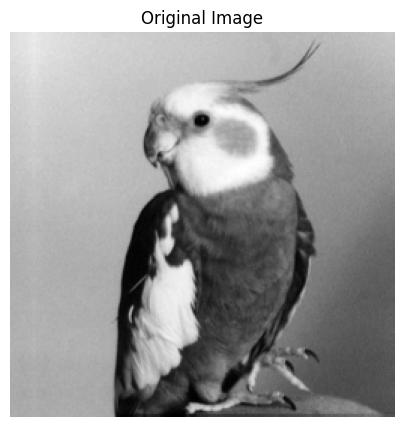

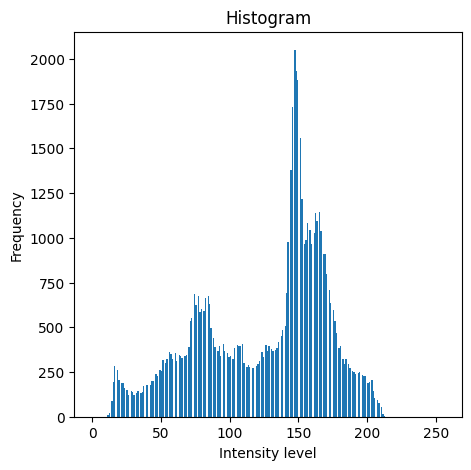

Contrast: 201.00
Entropy: 6.77
Average Intensity: 125.39


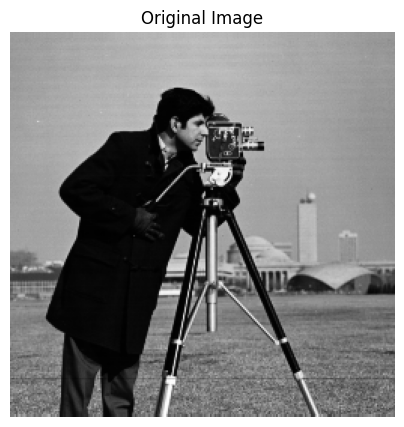

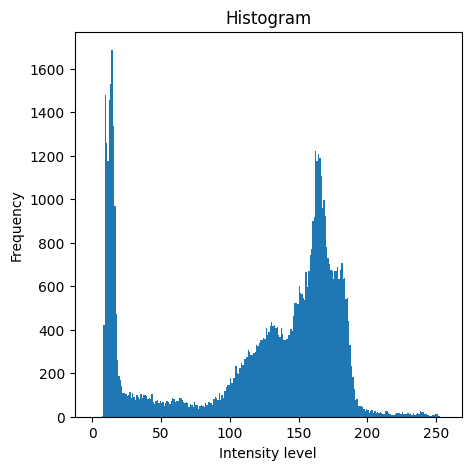

Contrast: 246.00
Entropy: 7.01
Average Intensity: 118.72


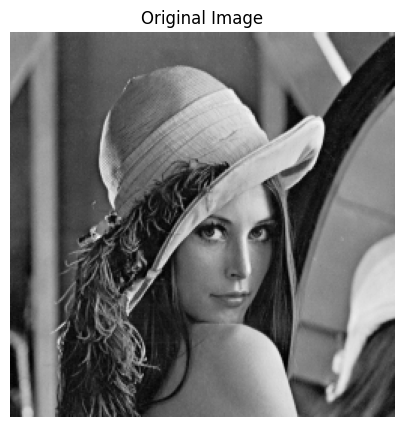

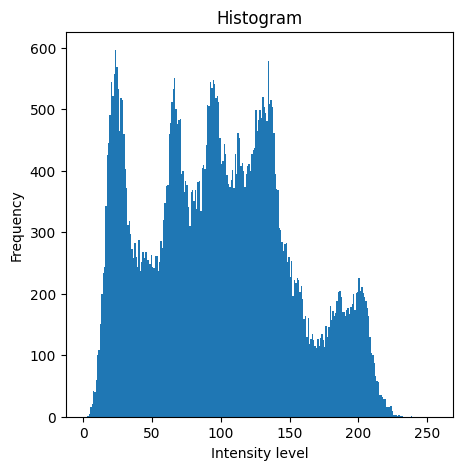

Contrast: 235.00
Entropy: 7.57
Average Intensity: 98.68


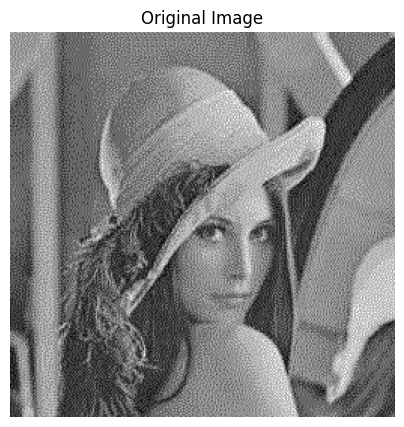

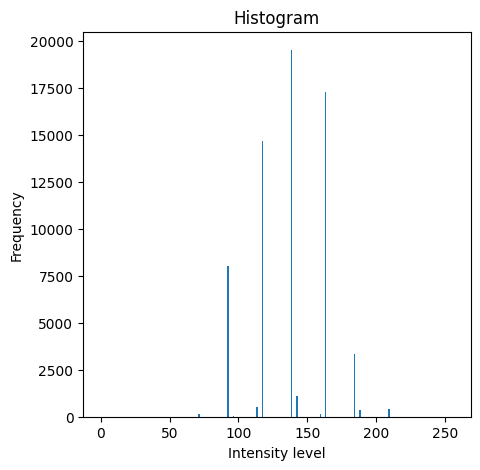

Contrast: 138.00
Entropy: 2.38
Average Intensity: 137.10


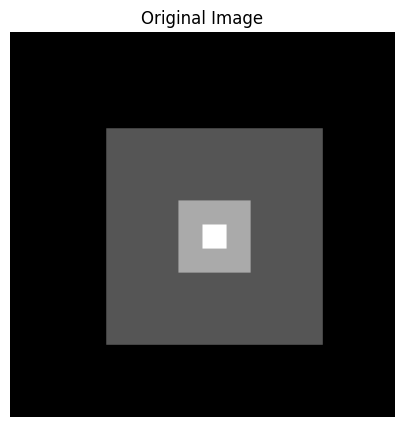

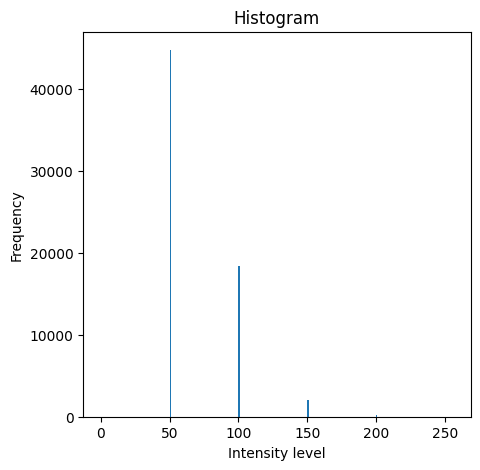

Contrast: 150.00
Entropy: 1.08
Average Intensity: 67.77


In [3]:
for obj_name in os.listdir('imgs/'): 
    if obj_name.endswith('.gif'):
        image = np.array(Image.open(f'imgs/{obj_name}').convert('L'))
        ImageUtils().image_information(image)
        

### Conclusões: 
- 

## Exercício 4

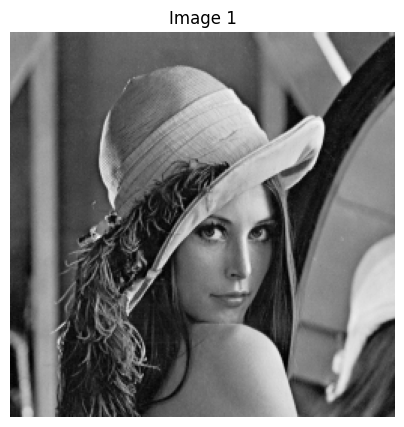

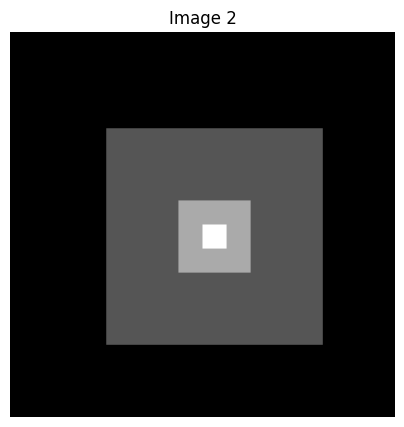

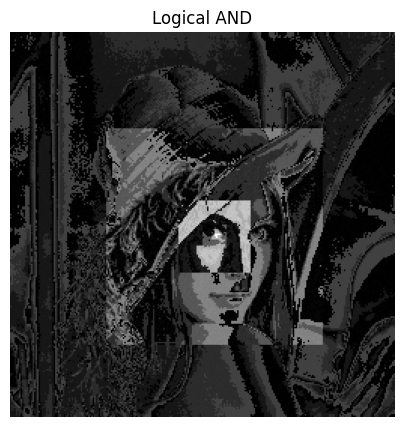

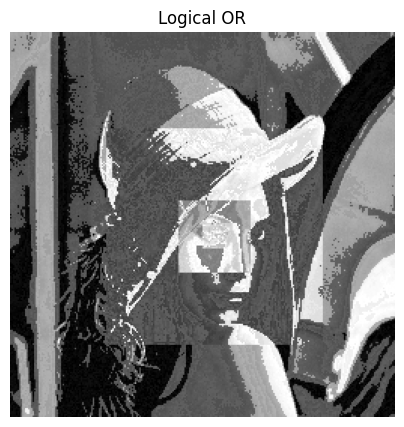

In [4]:
image1 = np.array(Image.open(f'imgs/lena.gif').convert('L'))
image2 = np.array(Image.open(f'imgs/squares.gif').convert('L'))

ImageUtils().image_show(image1, 'Image 1')
ImageUtils().image_show(image2, 'Image 2')

# Logical AND
image_and = ImageUtils().apply_logical_operation(image1=image1, image2=image2, operation=LogicalOperations.AND)
ImageUtils().image_show(image_and, 'Logical AND')

# Logical OR
image_or = ImageUtils().apply_logical_operation(image1=image1, image2=image2, operation=LogicalOperations.OR)
ImageUtils().image_show(image_or, 'Logical OR')        

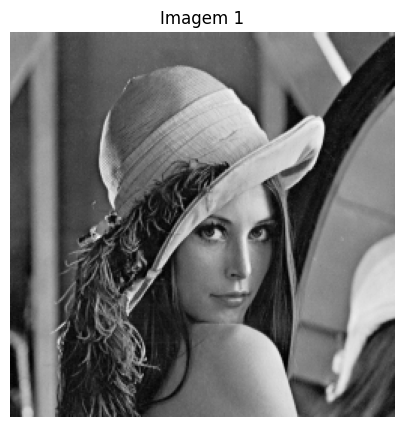

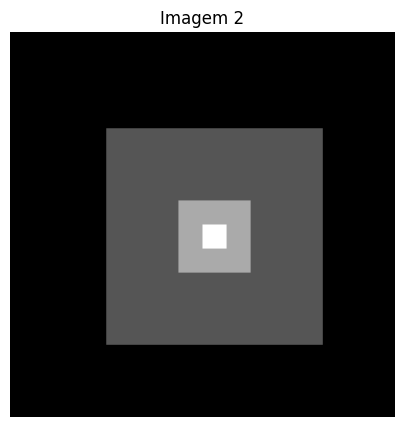

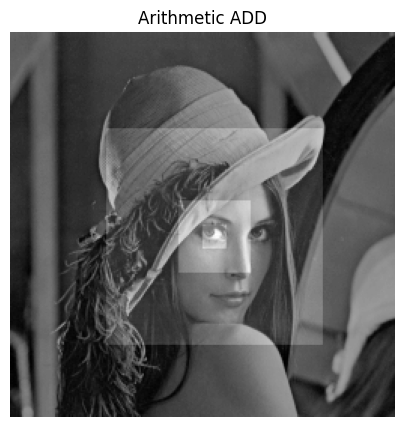

In [5]:
image1 = np.array(Image.open(f'imgs/lena.gif').convert('L'))
image2 = np.array(Image.open(f'imgs/squares.gif').convert('L'))

ImageUtils().image_show(image1, 'Imagem 1')
ImageUtils().image_show(image2, 'Imagem 2')

# Arithmetic ADD
image_add = ImageUtils().apply_arithmetic_operation(image1, image2, ArtihmeticOperations.ADD, alpha=0.5)
ImageUtils().image_show(image_add, 'Arithmetic ADD')

### Conclusões: 
- 

### Exercício 5

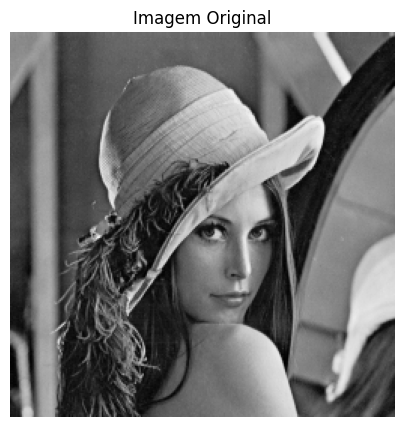

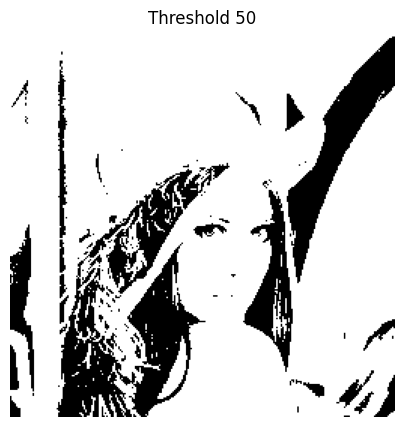

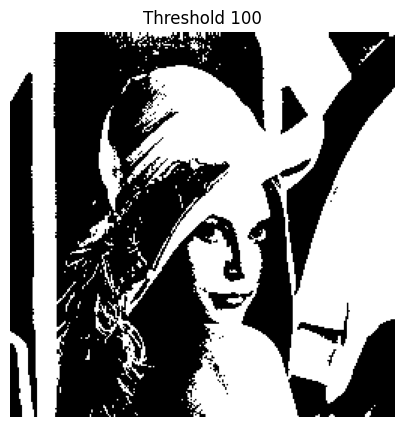

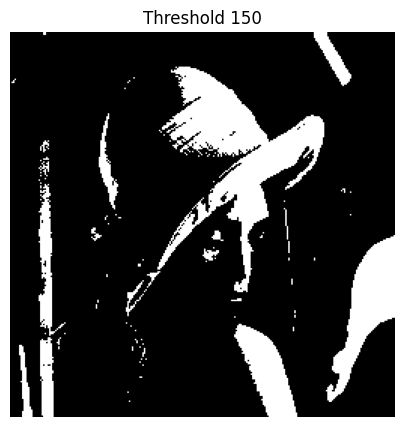

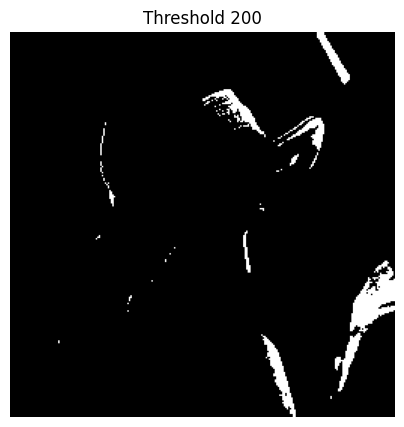

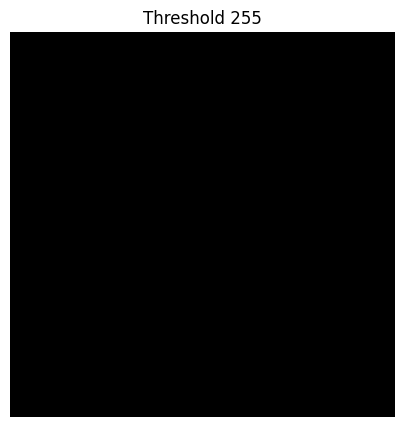

In [6]:
thresholds = [50, 100, 150, 200, 255]

image = np.array(Image.open(f'imgs/lena.gif').convert('L'))
ImageUtils().image_show(image, 'Imagem Original')

for th in thresholds:
    image_threshold = ImageUtils().thresholding(image=image, threshold=th)
    ImageUtils().image_show(image_threshold, f'Threshold {th}')

### Conclusões: 
- 

## Exercise 1 - Intensity Transformations

A) Implement and apply a contrast stretching function. Report the experimental results on three different images at your
choice. Compare the entropy and the contrast metric on the input and output image. Comment on the results.

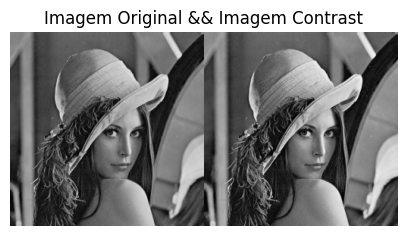

In [7]:
image = np.array(Image.open(f'imgs/lena.gif').convert('L'))
image_contrast, lookUpTable = ImageUtils().contrast_stretching(image, None, None)

compare_image_contrast = np.concatenate((image, image_contrast), axis=1)
ImageUtils().image_show(compare_image_contrast, 'Imagem Original && Imagem Contrast')


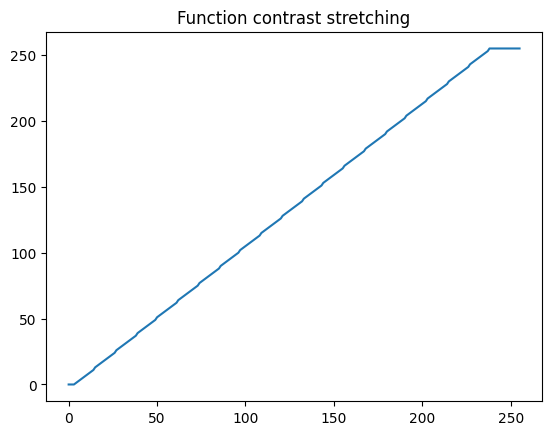

In [8]:
plt.plot(lookUpTable.T)
plt.title('Function contrast stretching')
plt.show()

+----------+------------+-----------+---------------------+
| Image    |   Contrast |   Entropy |   Average Intensity |
+==========+============+===========+=====================+
| Original |        235 |      7.57 |               98.68 |
+----------+------------+-----------+---------------------+
| Contrast |        255 |      7.57 |              103.34 |
+----------+------------+-----------+---------------------+


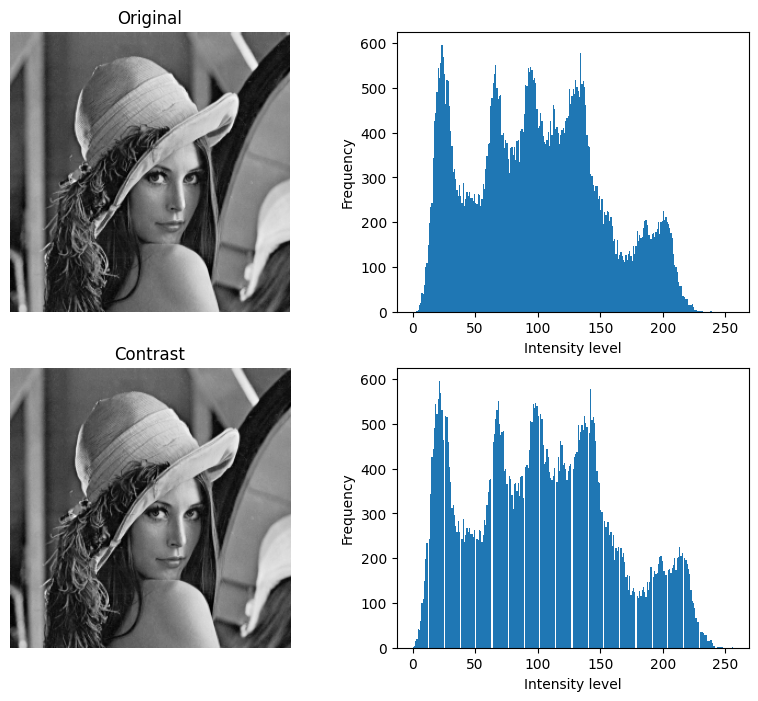

In [9]:
ImageUtils().images_information([image, image_contrast],['Original', 'Contrast'])

B) Consider the histogram equalization (HE) and histogram specification (HS) techniques. Apply the HE and HS operations
on three different images at your choice. Comment on the results.

+------------------------+------------+-----------+---------------------+
| Image                  |   Contrast |   Entropy |   Average Intensity |
+========================+============+===========+=====================+
| Original               |        235 |      7.57 |               98.68 |
+------------------------+------------+-----------+---------------------+
| histogram equalization |        255 |      7.43 |              128.29 |
+------------------------+------------+-----------+---------------------+


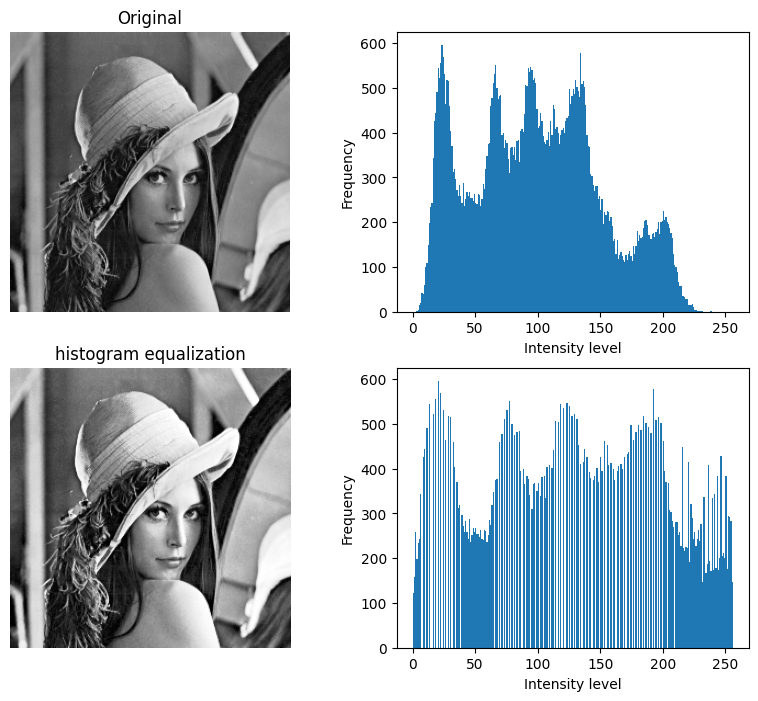

In [10]:
image = np.array(Image.open(f'imgs/lena.gif').convert('L'))
image_he = ImageUtils().histogram_equalization(image)

ImageUtils().images_information([image, image_he],['Original', 'histogram equalization'])


+-------------------------+------------+-----------+---------------------+
| Image                   |   Contrast |   Entropy |   Average Intensity |
+=========================+============+===========+=====================+
| original                |        235 |      7.57 |               98.68 |
+-------------------------+------------+-----------+---------------------+
| reference               |        201 |      6.77 |              125.39 |
+-------------------------+------------+-----------+---------------------+
| histogram specification |        201 |      6.81 |              125.23 |
+-------------------------+------------+-----------+---------------------+


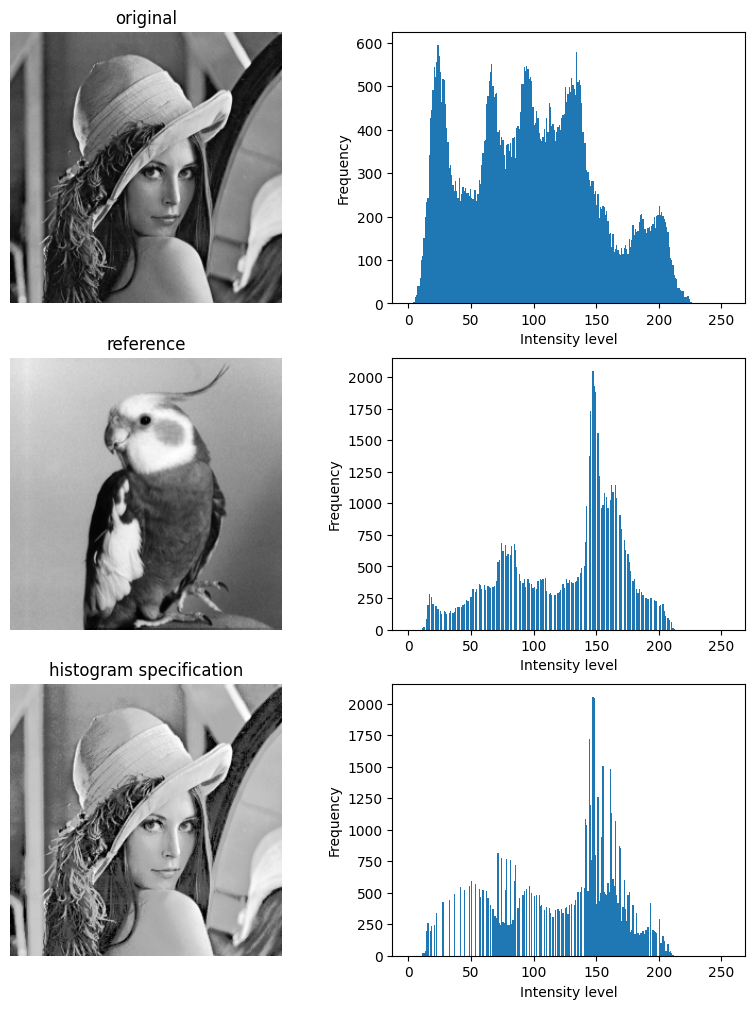

In [11]:
image = np.array(Image.open(f'imgs/lena.gif').convert('L'))
image_ref = np.array(Image.open(f'imgs/bird.gif').convert('L'))
image_hs = ImageUtils().histogram_specification(image,image_ref)

ImageUtils().images_information([image, image_ref, image_hs], ['original', 'reference', 'histogram specification'])

## Exercise 2 - Spatial Filtering

a) Consider the set of fingerprint images on the Fingerpints.zip file. For these fingerprint images, perform a sharpening
operation with the goal to highlight the ridges on the fingerprints.

+---------+------------+-----------+---------------------+
| Image   |   Contrast |   Entropy |   Average Intensity |
+=========+============+===========+=====================+
| #1      |        134 |      5.9  |              130.68 |
+---------+------------+-----------+---------------------+
| #1      |        126 |      5.71 |              116.17 |
+---------+------------+-----------+---------------------+
| #1      |        126 |      5.84 |              125    |
+---------+------------+-----------+---------------------+
| #2      |        132 |      5.88 |              129.94 |
+---------+------------+-----------+---------------------+
| #2      |        136 |      5.92 |              131.49 |
+---------+------------+-----------+---------------------+
| #2      |        126 |      5.9  |              130.23 |
+---------+------------+-----------+---------------------+
| #3      |        132 |      5.94 |              139.17 |
+---------+------------+-----------+--------------------

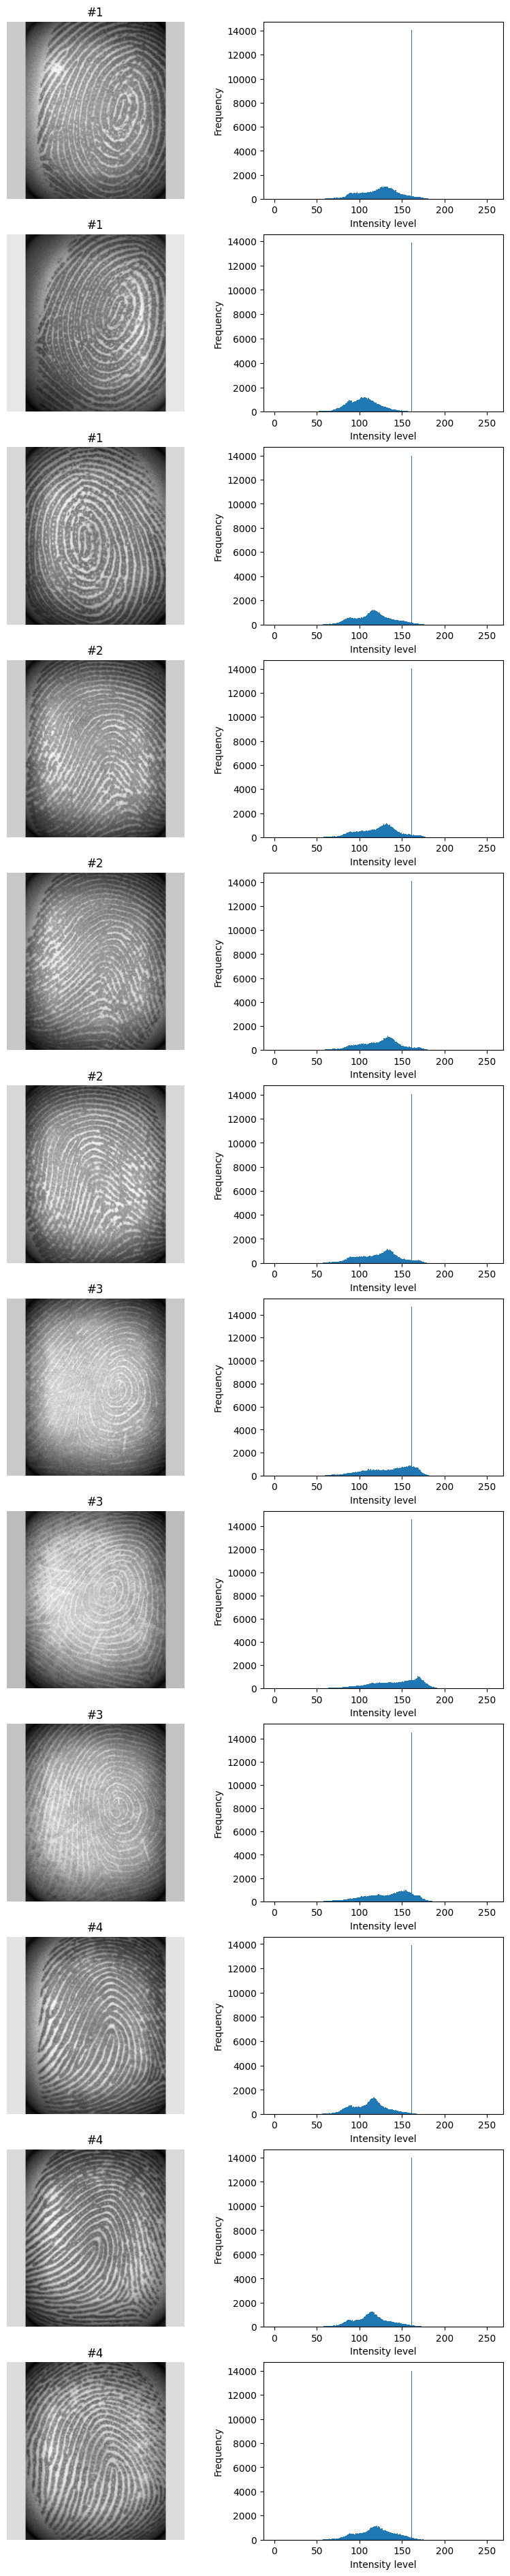

In [12]:
dataset_path = './FingerprintImages'
data, labels = ImageUtils().load_data(dataset_path)
ImageUtils().images_information(data, labels)

[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
+-----------------------+------------+-----------+---------------------+
| Image                 |   Contrast |   Entropy |   Average Intensity |
+=======================+============+===========+=====================+
| Original              |        134 |      5.9  |              130.68 |
+-----------------------+------------+-----------+---------------------+
| Custom Kernel         |        255 |      0.08 |                2.64 |
+-----------------------+------------+-----------+---------------------+
| Canny                 |        255 |      0.57 |               34.77 |
+-----------------------+------------+-----------+---------------------+
| Sobel                 |        255 |      0.92 |               86.41 |
+-----------------------+------------+-----------+---------------------+
| Roberts               |        255 |      0.68 |               45.86 |
+-----------------------+------------+-----------+---------------------+
| Pre

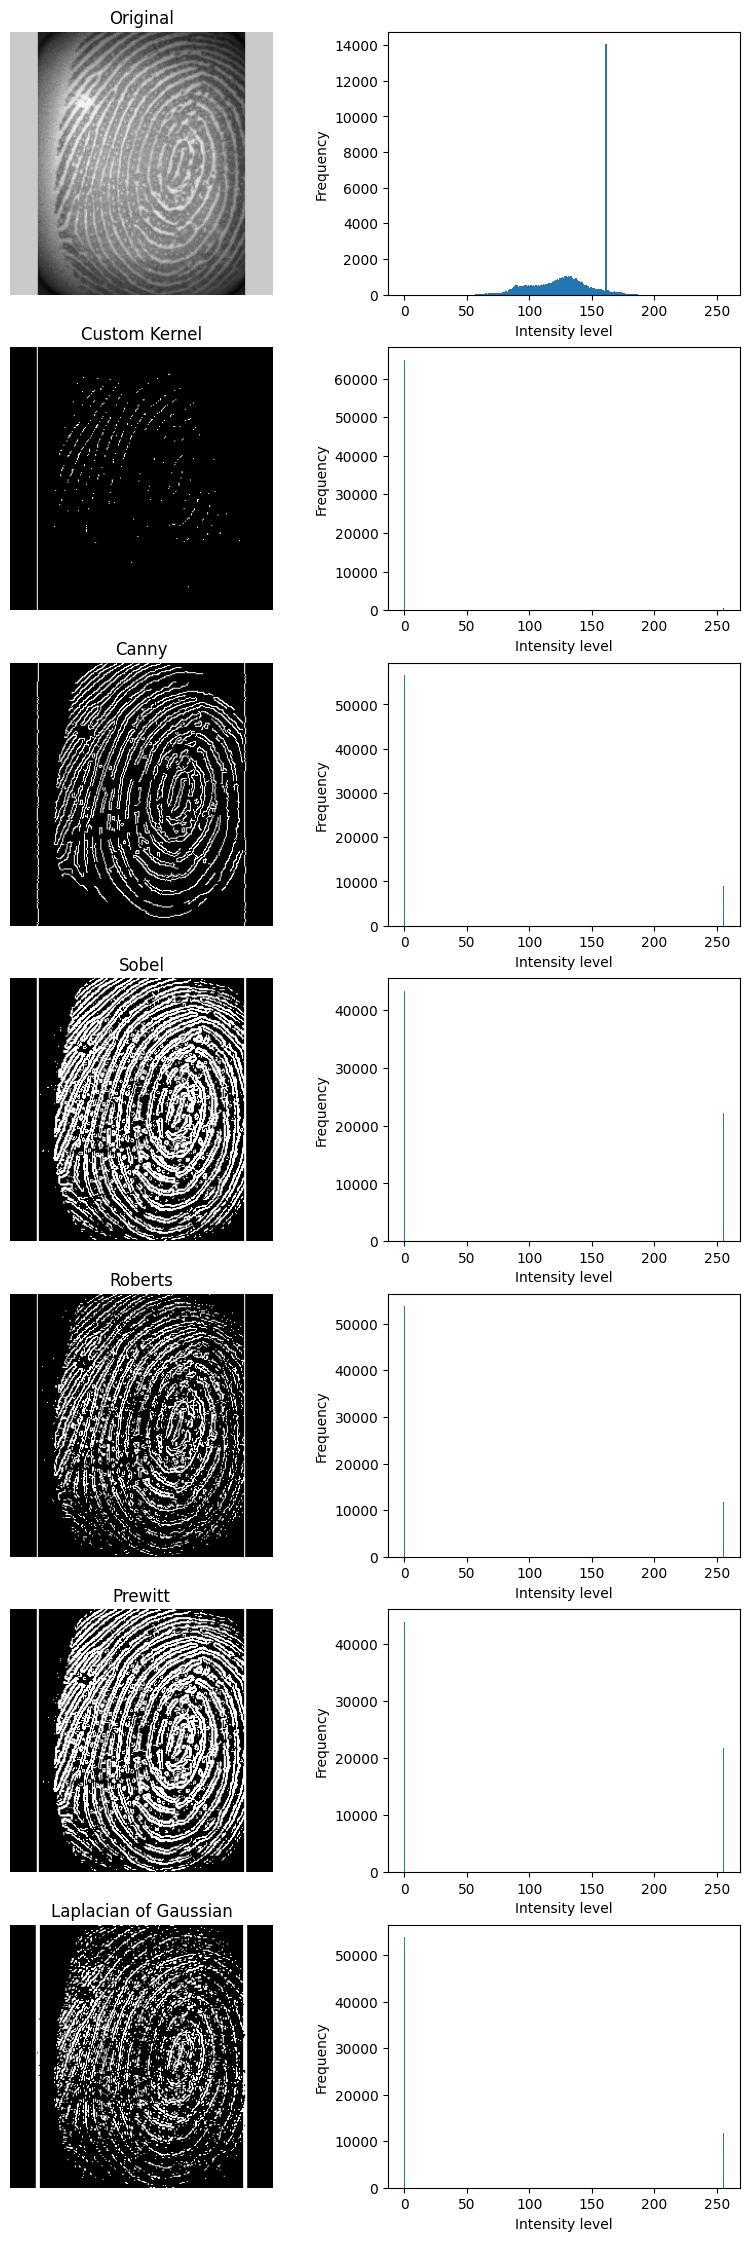

In [13]:
#image = np.array(Image.open(f'imgs/lena.gif').convert('L'))
image = data[0]
kernel = np.zeros((3,3),np.float32)
kernel[1,1] = 1
kernel[2,2] = -1
print(kernel)

titles = ['Original', 'Custom Kernel', 'Canny', 'Sobel', 'Roberts', 'Prewitt', 'Laplacian of Gaussian']
sharpeningOperations = [
    SharpeningOperations.CUSTOM, 
    SharpeningOperations.CANNY, 
    SharpeningOperations.SOBEL, 
    SharpeningOperations.ROBERTS, 
    SharpeningOperations.PREWITT, 
    SharpeningOperations.LOG
]
images = [image]

for operation in sharpeningOperations:
    if operation  == SharpeningOperations.CUSTOM:
        img = ImageUtils().edge_detection(image, operation, kernel)
    else:
        img = ImageUtils().edge_detection(image, operation)

    img = ImageUtils().thresholding(image=img, threshold=30) # convert to binary 
    images.append(img)

ImageUtils().images_information(images, titles)

b) From the sharpened fingerprint images compute their binary versions. Comment on the results.

+---------+------------+-----------+---------------------+
| Image   |   Contrast |   Entropy |   Average Intensity |
+=========+============+===========+=====================+
| #1      |        255 |      0.92 |               86.41 |
+---------+------------+-----------+---------------------+
| #1      |        255 |      0.87 |               74.57 |
+---------+------------+-----------+---------------------+
| #1      |        255 |      0.98 |              104.42 |
+---------+------------+-----------+---------------------+
| #2      |        255 |      0.91 |               83.74 |
+---------+------------+-----------+---------------------+
| #2      |        255 |      0.9  |               80.57 |
+---------+------------+-----------+---------------------+
| #2      |        255 |      0.93 |               87.29 |
+---------+------------+-----------+---------------------+
| #3      |        255 |      0.6  |               37.71 |
+---------+------------+-----------+--------------------

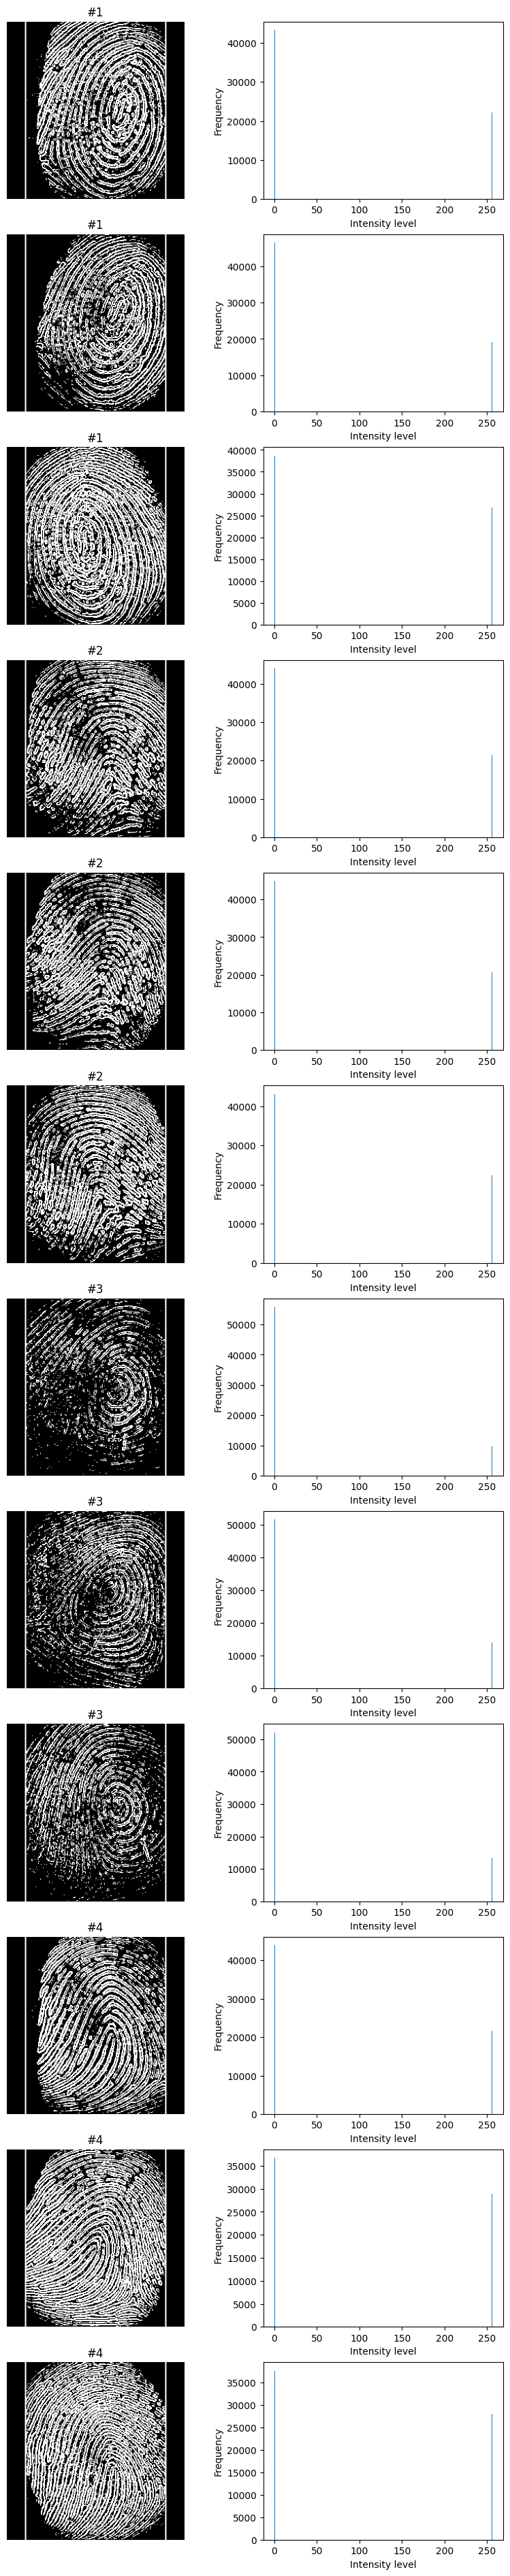

In [14]:

images_shap = [] 
for img in data:
    res = ImageUtils().edge_detection(img, SharpeningOperations.SOBEL)
    res = ImageUtils().thresholding(image=res, threshold=30) 
    images_shap.append(res)

ImageUtils().images_information(images_shap, labels)

    